In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Draw inline
%matplotlib inline

In [3]:
#load users
users = pd.read_csv(r"C:\Users\tmacd\program1\final\train_users2.csv")

In [4]:
#Data Cleaning
#check for nulls
users.isnull().sum()

#date_first_booking shows users who did not mak

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

C:\Users\tmacd\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


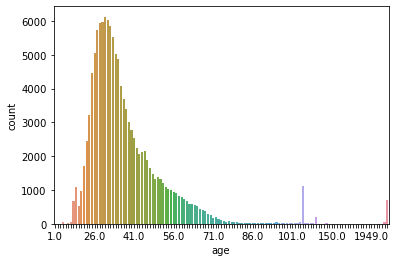

In [33]:
#examining age
users['age'] = users['age'].dropna()

age_plot = sns.countplot(users['age'])

#limiting tick frequency for ease of readability 
#look how frickin' pretty
for ind, label in enumerate(age_plot.get_xticklabels()):
    if ind % 15 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

In [34]:
#it doesn't make sense to have ages at 1 and above 100 ???

users['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [36]:
#transform outliers into NaN. bye, felicia

users.loc[users['age'] < 15, 'age'] = np.NaN
users.loc[users['age'] > 100, 'age'] = np.NaN

C:\Users\tmacd\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

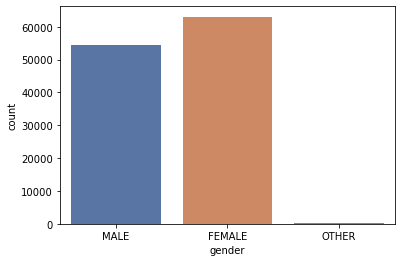

In [37]:
sns.countplot(users['gender'], palette = "deep")

C:\Users\tmacd\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

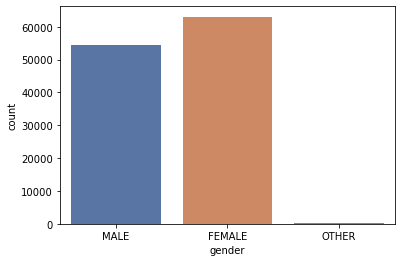

In [38]:
#unknowns?
#change unknowns to NaN
users.loc[users['gender'] == '-unknown-', 'gender'] = np.NaN
sns.countplot(users['gender'],  palette = "deep")

In [39]:
f = sum(users['gender'] == 'FEMALE')
m = sum(users['gender'] == 'MALE')
print(f,m)

#there are 63041 women and 54440 men

63041 54440


In [40]:
#any trend in country destinations in users who put NaN as their gender?

#total number who have NaN genders, and their destinations (proportional)
na_genders = users.loc[users['gender'].isna(), 'country_destination'].value_counts().sum()
na_gender_countries = users.loc[users['gender'].isna(), 'country_destination'].value_counts() / na_genders * 100

#non NaN country destinations (proportional)
complete_genders = users.loc[users['gender'].notnull(), 'country_destination'].value_counts().sum()
complete_gender_countries = users.loc[users['gender'].notnull(), 'country_destination'].value_counts() / complete_genders * 100

compared_na_genders = pd.concat([na_gender_countries, complete_gender_countries], axis = 1)
compared_na_genders.columns = ['na - countries', 'gender - countries']
compared_na_genders

#so definitely greater proportion of folks who have NaN as a gender don't book 
#    a trip anywhere

,na - countries,gender - countries
NDF,69.674358,49.143619
US,21.015174,35.891579
other,3.625324,5.625706
FR,1.790193,2.810730
IT,1.086866,1.524248
GB,0.792158,1.329789
ES,0.747220,1.302616
CA,0.513126,0.795666
DE,0.296798,0.659800
NL,0.237229,0.454302


In [41]:

#find number of female and male users

female = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts().sum()
male = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts().sum()

#scale according to total numbers of female and male users

female_destinations = users.loc[users['gender'] == 'FEMALE', 'country_destination'].value_counts() / female * 100
male_destinations = users.loc[users['gender'] == 'MALE', 'country_destination'].value_counts() / male * 100

gender_dest = pd.concat([female_destinations, male_destinations], axis=1)
gender_dest.columns = ['female destinations', 'male destinations']
gender_dest

,female destinations,male destinations
NDF,49.250488,49.079721
US,35.998794,35.740265
other,5.012611,6.324394
FR,3.112260,2.452241
IT,1.730620,1.283982
GB,1.397503,1.252755
ES,1.353088,1.243571
CA,0.721753,0.876194
DE,0.567884,0.764144
NL,0.402912,0.510654


Text(0, 0.5, 'Percentage')

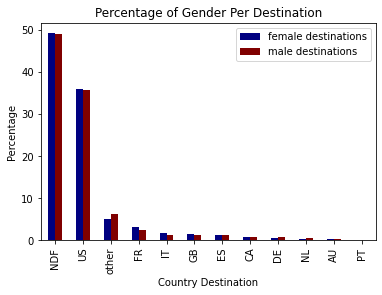

In [42]:
ax = gender_dest.plot.bar(colormap = 'jet', title = 'Percentage of Gender Per Destination')
ax.set_xlabel("Country Destination")
ax.set_ylabel("Percentage")

# Looks just about the same for both groups - nothing stands out here

In [43]:
#checking what format the dates are in, as they're not in timestamp form (from users.dtypes)

print("Date Account Created","\n", users['date_account_created'].sample(3))
print("\n")
print("Date of First Booking", "\n", users['date_first_booking'].sample(3))

Date Account Created 
 121263   2013-11-02
13162    2011-11-28
147212   2014-01-29
Name: date_account_created, dtype: datetime64[ns]


Date of First Booking 
 153979   2014-02-18
160589          NaT
149013          NaT
Name: date_first_booking, dtype: datetime64[ns]


In [44]:
#convert dates to proper datetime notation

users['date_account_created'] = pd.to_datetime(users['date_account_created'], format = '%Y-%m-%d', errors='coerce')
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'], format = '%Y-%m-%d', errors='coerce')

users['date_account_created'].describe()

C:\Users\tmacd\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                  213451
unique                   1634
top       2014-05-13 00:00:00
freq                      674
first     2010-01-01 00:00:00
last      2014-06-30 00:00:00
Name: date_account_created, dtype: object

In [45]:
#finding average length between account created and first boooking 
users['Difference'] = users['date_first_booking'] - users['date_account_created']
print("Average length between account creation & first booking:", users['Difference'].mean())

Average length between account creation & first booking: 44 days 08:41:59.854231340


In [46]:
users['Difference'].describe()

#How are there negative days between account creation & first booking?

count                         88908
mean     44 days 08:41:59.854231340
std      87 days 11:59:22.090141649
min             -349 days +00:00:00
25%                 1 days 00:00:00
50%                 3 days 00:00:00
75%                29 days 00:00:00
max               365 days 00:00:00
Name: Difference, dtype: object

In [47]:
users[users['Difference'] < pd.Timedelta(0)].sample(5)

#strange - looks like either AirBnb allows you book before creating an account, or this data has been entered incorrectly
#for now, going to disregard - but note the date columns might not be entirely trustworthy
#upon futhur research, can replace date values as needed

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,Difference,OG_Difference,First Lag
31851,vwrrgjr1h4,2012-08-29,2012-07-13,2012-07-21,FEMALE,40.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,US,-39 days,8 days,47 days
35897,sxbrpl4sve,2012-08-28,2012-08-10,2012-08-10,MALE,NaN,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Chrome,US,-18 days,0 days,18 days
12654,zrt9c49q6s,2011-11-19,2011-11-15,2011-11-16,MALE,57.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,-3 days,1 days,4 days
56207,s5md0xwree,2013-01-27,2013-01-16,2013-01-16,FEMALE,41.0,facebook,0,en,sem-brand,google,omg,Web,Mac Desktop,Firefox,US,-11 days,0 days,11 days
36380,zc6l2r2t71,2012-11-08,2012-08-14,2012-08-15,MALE,51.0,facebook,12,en,api,other,untracked,iOS,iPhone,-unknown-,other,-85 days,1 days,86 days


C:\Users\tmacd\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\tmacd\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\tmacd\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


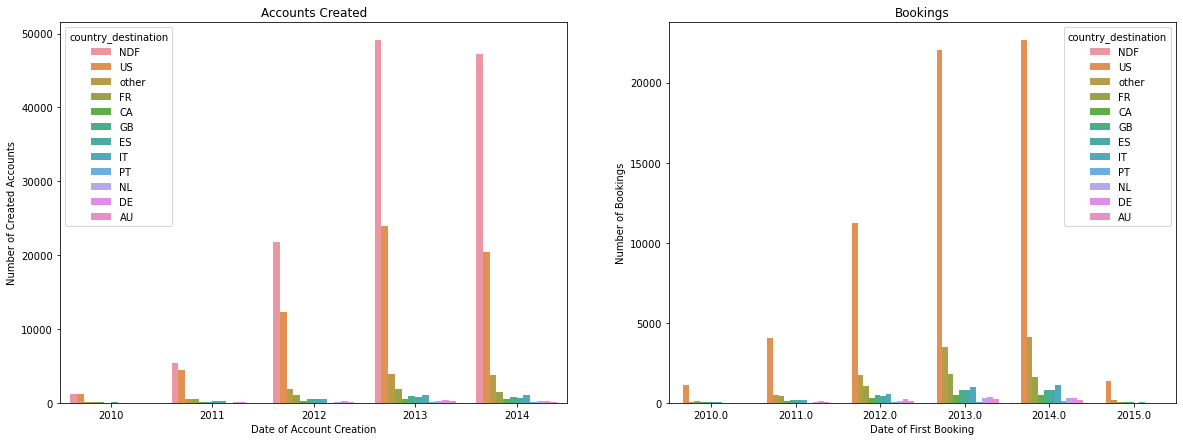

In [48]:
# visualize dates that accounts are created, and the first booking happens

grouped_create_date = users['date_account_created'].dt.year
grouped_first_date = users['date_first_booking'].dt.year

fig, ax = plt.subplots(1,2, figsize=(20, 7))
sns.countplot((grouped_create_date), ax=ax[0], hue = users['country_destination'])
sns.countplot((grouped_first_date), ax=ax[1], hue = users['country_destination'])

ax[0].set_xlabel('Date of Account Creation')
ax[0].set_ylabel('Number of Created Accounts')
ax[0].set_title('Accounts Created')

ax[1].set_xlabel('Date of First Booking')
ax[1].set_ylabel('Number of Bookings')
ax[1].set_title('Bookings')

fig.show()

In [52]:
#now to correct the format of 'timestamp_first_active'
#TEST 
#print(type(users['timestamp_first_active'][0]))
#print(users['timestamp_first_active'].sample(2))

#users['timestamp_first_active'] = pd.to_datetime((users['timestamp_first_active']//1000000), format='%Y%m%d')

In [51]:
#finding average length between first active day and account creation

users['OG_Difference'] = users['date_first_booking'] - users['timestamp_first_active']
print("Average length between account first active & first booking:", users['OG_Difference'].mean())

#looks to be about the same as account creation & first booking - are account creation & first active very similar same?

users['First Lag'] = users['date_account_created'] - users['timestamp_first_active']
print("Average length between account first active & date account created:", users['First Lag'].mean())

#Looks like most people created their account on the same day they were first active

users['First Lag'].describe()

#although one user waited 1456 days after they were first active to create an account!

Average length between account first active & first booking: 44 days 16:36:44.022135241
Average length between account first active & date account created: 0 days 05:33:49.162664967


count                        213451
mean      0 days 05:33:49.162664967
std      11 days 22:45:41.307539071
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 0 days 00:00:00
max              1456 days 00:00:00
Name: First Lag, dtype: object

C:\Users\tmacd\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


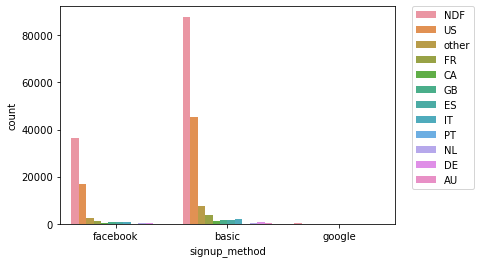

In [53]:
#explore categorical variables - do any have initial trends?

sns.countplot(users['signup_method'], hue = users['country_destination'])

#setting legend outside of display box
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

C:\Users\tmacd\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


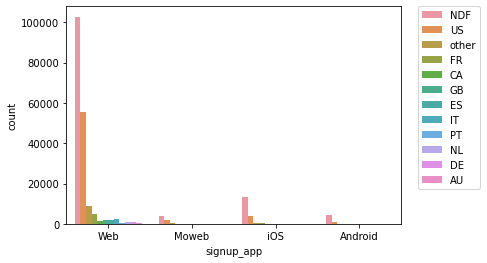

In [54]:
sns.countplot(users['signup_app'], hue = users['country_destination'])

#setting legend outside of display box
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [55]:
#use transpose to show items across columns rather than rows
first_device_type = users['first_device_type'].value_counts()
pd.DataFrame(first_device_type).transpose()

,Mac Desktop,Windows Desktop,iPhone,iPad,Other/Unknown,Android Phone,Android Tablet,Desktop (Other),SmartPhone (Other)
first_device_type,89600,72716,20759,14339,10667,2803,1292,1199,76


In [56]:

language = users['language'].value_counts()
pd.DataFrame(language).transpose()

,en,zh,fr,es,ko,de,it,ru,pt,ja,...,cs,no,th,el,id,hu,fi,ca,is,hr
language,206314,1632,1172,915,747,732,514,389,240,225,...,32,30,24,24,22,18,14,5,5,2


In [57]:
########################
#DO NOT GO PAST HERE
########################

In [1]:
#looking for other ways gender and airbnb country destination

